# Retrieval Augmented Generation (RAG) App:
One of the most powerful applications enabled by LLMs is sophisticated question-answering (Q&A) chatbots. These are applications that can answer questions about specific source information. These applications use a technique known as Retrieval Augmented Generation, or RAG.

## Overview
A typical RAG application has two main components:

* **Indexing:** a pipeline for ingesting data from a source and indexing it. This usually happens offline.

* **Retrieval and generation:** the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.

The most common full sequence from raw data to answer looks like:

## Indexing
1. **Load:** First we need to load our data. This is done with Document Loaders.
2. **Split:** Text splitters break large Documents into smaller chunks. This is useful both for indexing data and passing it into a model, as large chunks are harder to search over and won't fit in a model's finite context window.
3. **Store:** We need somewhere to store and index our splits, so that they can be searched over later. This is often done using a VectorStore and Embeddings model.

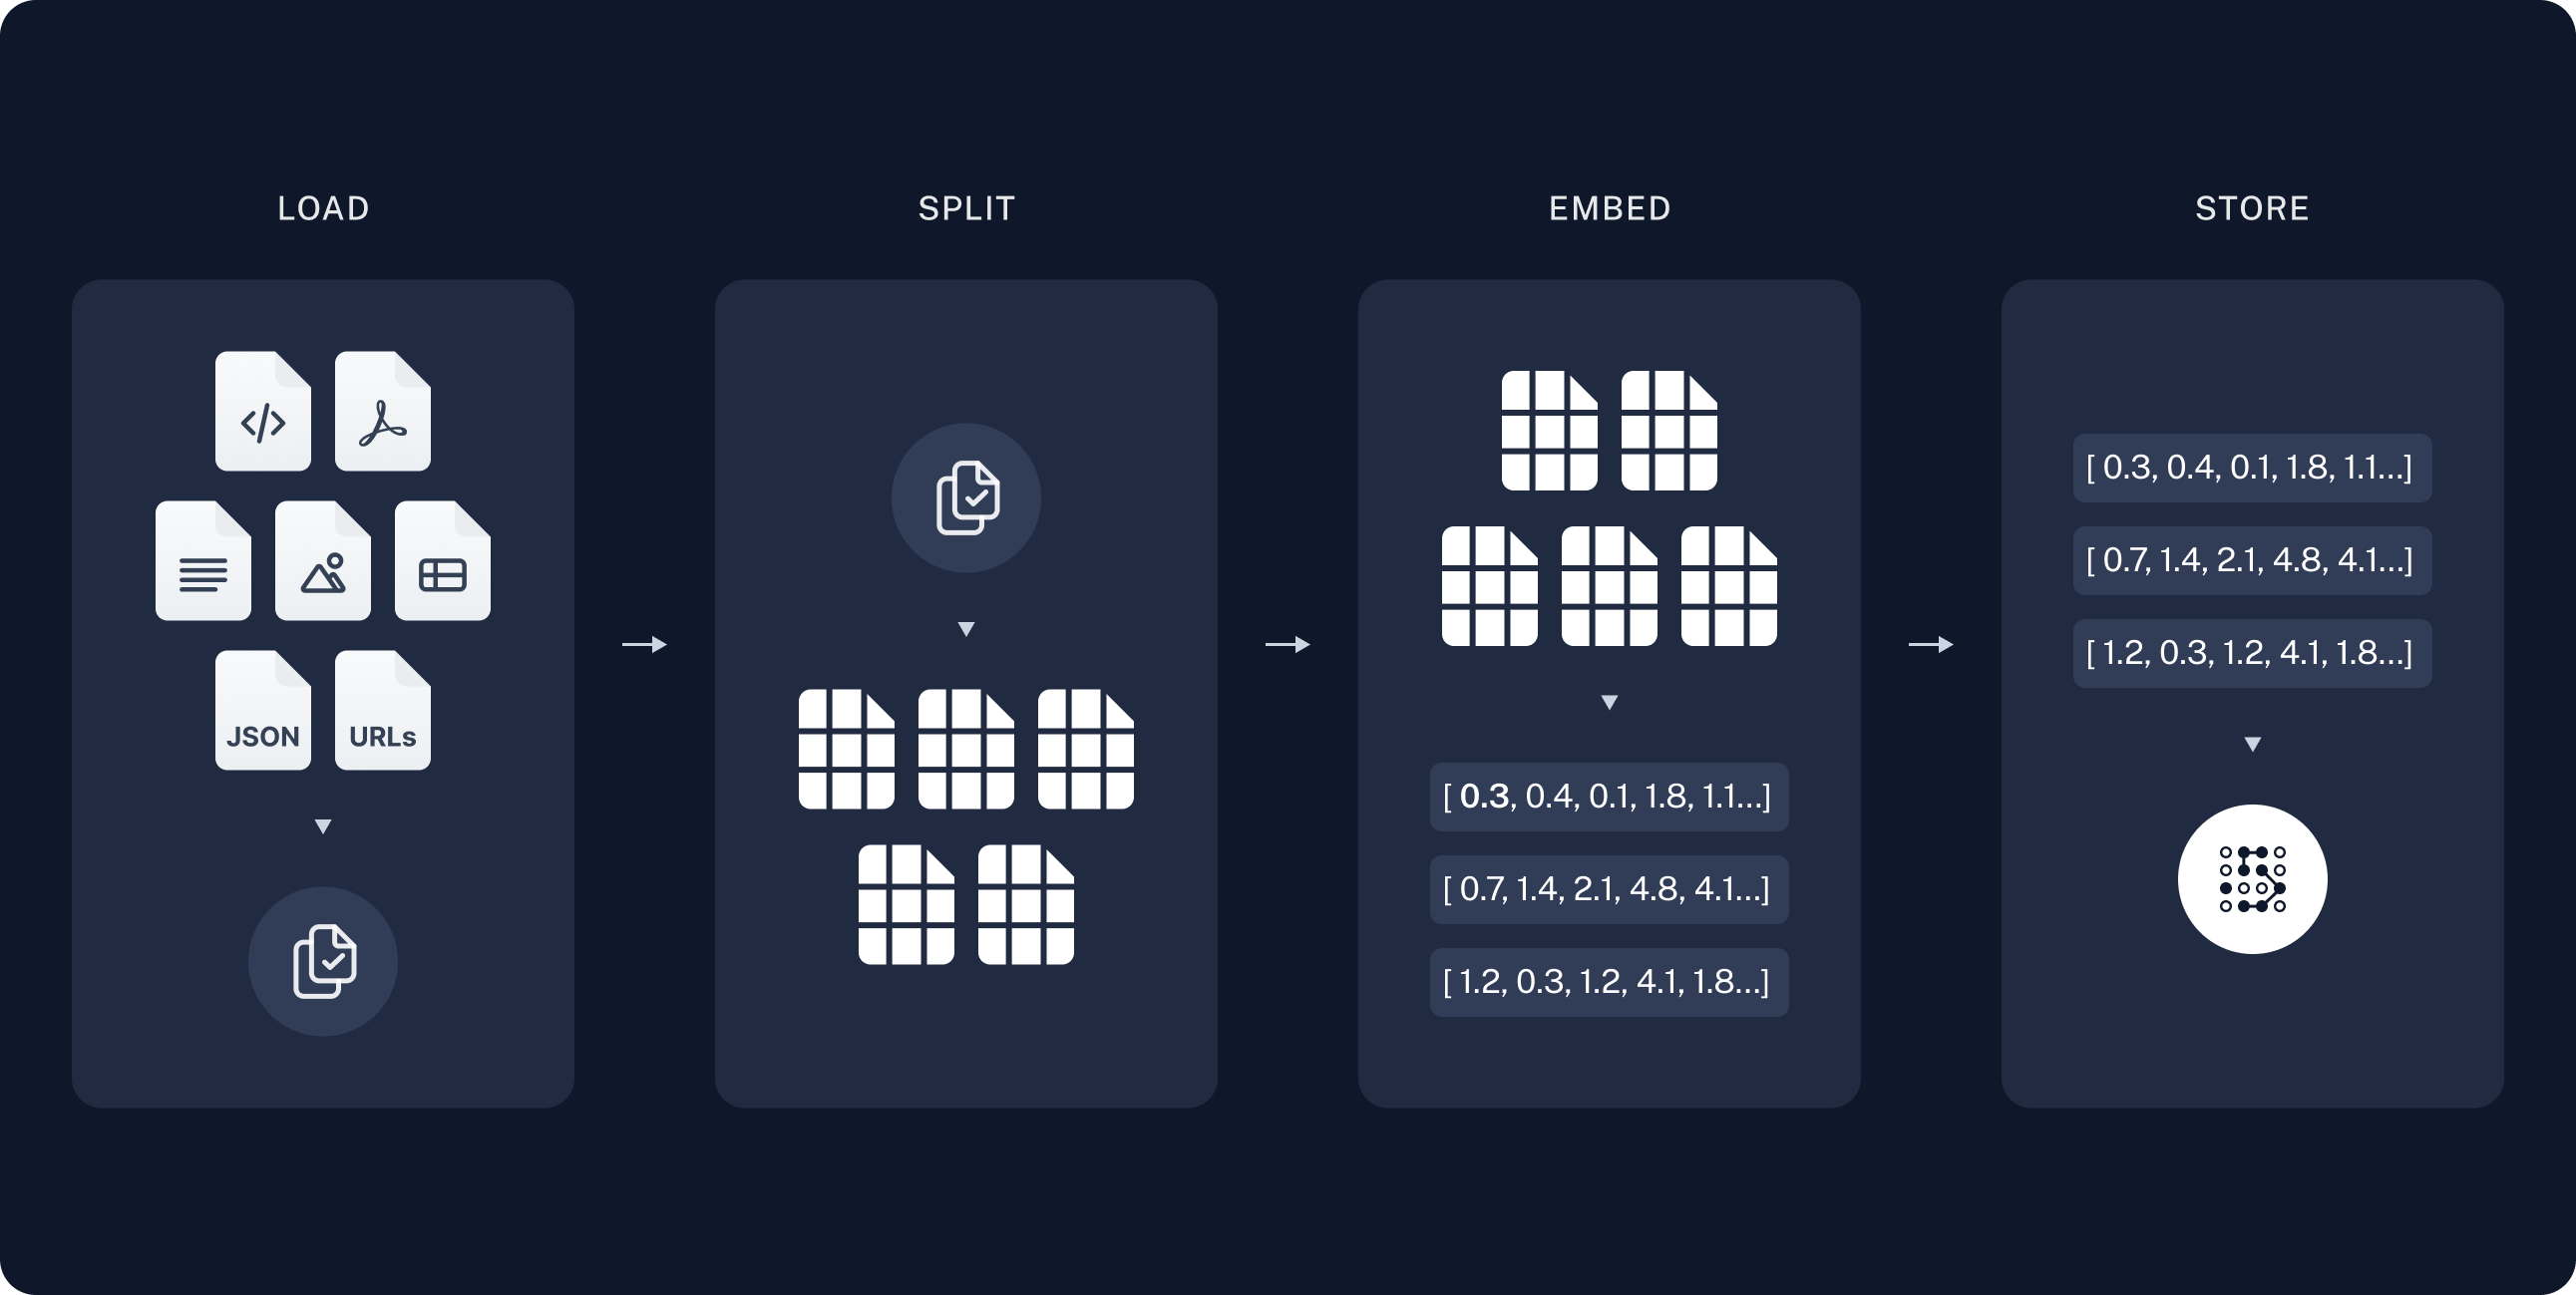

## Retrieval and generation
4. **Retrieve:** Given a user input, relevant splits are retrieved from storage using a Retriever.
5. **Generate:** A ChatModel / LLM produces an answer using a prompt that includes both the question with the retrieved data

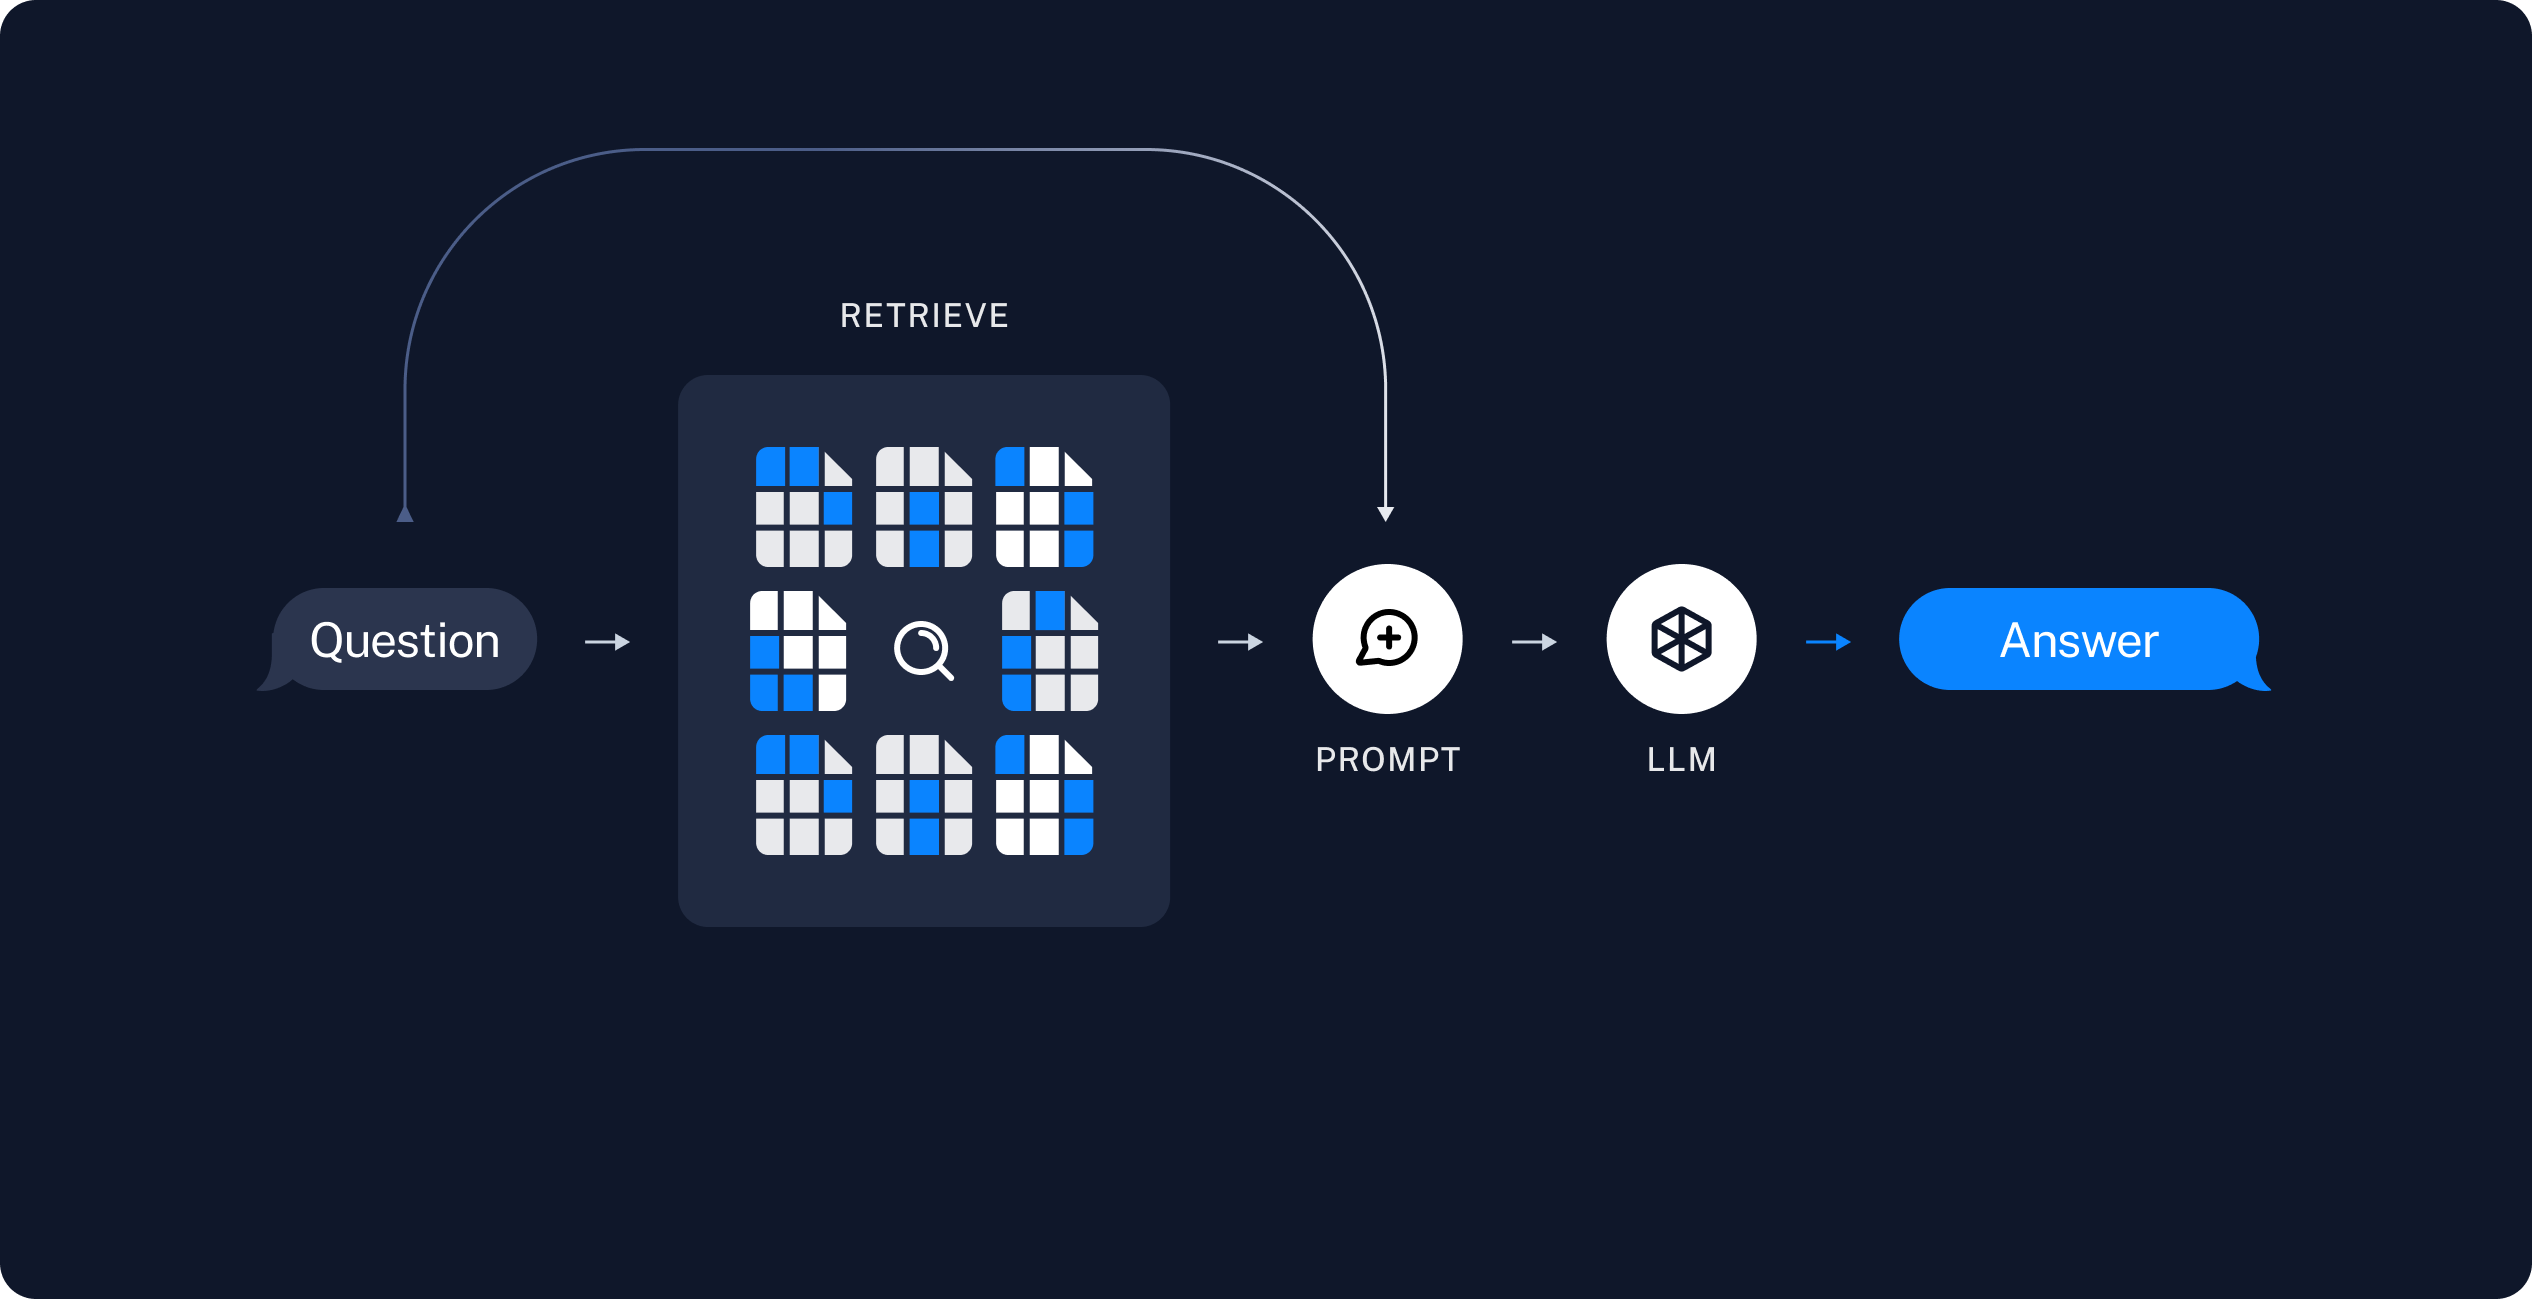

In [1]:
# Install required LangChain and related libraries
!pip install langchain langchain-community langchain-openai langchain-text-splitters colab-xterm langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.33
    Uninstalling langchain-core-0.3.33:
      Successfully uninstalled langchain-core-0.3.33
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters

## LangSmith
Many of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls. As these applications get more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent. The best way to do this is with LangSmith.

In [3]:
import getpass
import os
# Enable LangSmith tracing for monitoring and debugging
os.environ["LANGSMITH_TRACING"] = "true"

# Securely input LangSmith API key
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

··········


In [4]:
import warnings
warnings.filterwarnings("ignore")

# Components
We will need to select three components from LangChain's suite of integrations.

## [Select chat model:](https://python.langchain.com/docs/integrations/chat/)

### **Running Ollama Locally on Google Colab Using Colab-Xterm**  

Ollama allows you to run large language models (LLMs) locally, and with **Colab-Xterm**, you can install and run it directly inside a Colab notebook.  

#### **Steps to Install and Run Ollama in Colab**  

1. **Install and Launch Colab-Xterm**  
   In a Colab cell, run:  

   ```python
   !pip install colab-xterm
   %load_ext colabxterm
   %xterm
   ```

   This opens a terminal window inside Colab.

2. **Install Ollama in the Terminal**  
   Inside the terminal, run:  

   ```bash
   curl -fsSL https://ollama.com/install.sh | sh
   ```

3. **Start Ollama as a Background Service**  
   Still in the same terminal, start Ollama:  

   ```bash
   ollama serve &
   ```

   The `&` makes it run in the background so you can keep using the terminal.

4. **Verify Ollama is Running (Now Usable in Colab Cells)**  
   You can now check if Ollama is running by executing the following command in a **Colab cell (not the terminal)**:  

   ```python
   !ollama list
   ```

5. **Download a Model**  
   Since Ollama is running in the background, you can now pull a model from the Ollama repository using a Colab cell:  

   ```python
   !ollama pull mistral
   ```


In [5]:
%load_ext colabxterm

In [29]:
%reload_ext colabxterm

In [6]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [30]:
!ollama list

NAME    ID    SIZE    MODIFIED 


In [31]:
!ollama pull llama3.2

pulling manifest 
pulling dde5aa3fc5ff... 100% ▕▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 56bb8bd477a5...   0% ▕▏    0 B/  96 B                  pulling manifest 
pulling dde5aa3fc5ff... 100% ▕▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 56bb8bd477a5...   0% ▕▏    0 B/  96 B                  pulling manifest 
pulling dde5aa3fc5ff... 100% ▕▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 56bb8bd477a5...   0% ▕▏    0 B/  96 B       

In [32]:
!ollama list

NAME               ID              SIZE      MODIFIED      
llama3.2:latest    a80c4f17acd5    2.0 GB    5 seconds ago    


In [33]:
from openai import OpenAI
from langchain_openai import ChatOpenAI

# 1. Default OpenAI
client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama', # required but ignored
)


# 2. Langchain
llm = ChatOpenAI(
    api_key="ollama", # required but ignored
    model="llama3.2",
    base_url="http://localhost:11434/v1",
)

## [Select embeddings model:](https://python.langchain.com/docs/integrations/text_embedding/)

In [34]:
!ollama pull nomic-embed-text

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠙ pulling manifest ⠙ pulling manifest 
pulling 970aa74c0a90...   0% ▕▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   4% ▕▏  10 MB/274 MB                  pulling manifest 
pulling 970aa74c0a90...  13% ▕▏  35 MB/274 MB                  pulling manifest 
pulling 970aa74c0a90...  24% ▕▏  64 MB/274 MB                  pulling manifest 
pulling 970aa74c0a90...  30% ▕▏  82 MB/274 MB                  pulling manifest 
pulling 970aa74c0a90...  

In [35]:
!pip install -qU langchain-ollama

In [36]:
from langchain_ollama import OllamaEmbeddings

embedding = OllamaEmbeddings(
    model="nomic-embed-text"
)

The specific website we will use is the [LLM Powered Autonomous Agents](https://lilianweng.github.io/posts/2023-06-23-agent/) blog post by Lilian Weng, which allows us to ask questions about the contents of the post.

# 1. Indexing

## Loading documents
We need to first load the blog post contents. We can use [DocumentLoaders](https://python.langchain.com/docs/concepts/document_loaders/) for this, which are objects that load in data from a source and return a list of [Document](https://python.langchain.com/api_reference/core/documents/langchain_core.documents.base.Document.html) objects.

In this case we’ll use the [WebBaseLoader](https://python.langchain.com/docs/integrations/document_loaders/web_base/), which uses urllib to load HTML from web URLs and `BeautifulSoup` to parse it to text. We can customize the HTML -> text parsing by passing in parameters into the BeautifulSoup parser via `bs_kwargs` (see [BeautifulSoup docs](https://beautiful-soup-4.readthedocs.io/en/latest/#beautifulsoup)). In this case only HTML tags with class `“post-content”`, `“post-title”`, or `“post-header”` are relevant, so we’ll remove all others.

In [37]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# Define the URL of the blog post to be loaded
blog_url = "https://lilianweng.github.io/posts/2023-06-23-agent/"

# Use BeautifulSoup's Strainer to extract only relevant sections:
# post title, headers, and main content, avoiding unnecessary HTML elements.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content"))

# Initialize the web loader with the target URL and BeautifulSoup parsing settings
documents = WebBaseLoader(
    web_paths=(blog_url,),
    bs_kwargs={"parse_only": bs4_strainer}  # Apply the strainer filter
)

# Fetch the documents asynchronously and store them in a list
docs = []
async for doc in documents.alazy_load():
    docs.append(doc)

# Ensure that only one document has been retrieved
assert len(docs) == 1, "Expected exactly one document, but got multiple or none."

# Output the length of the extracted page content
len(docs[0].page_content)

Fetching pages: 100%|##########| 1/1 [00:00<00:00, 33.27it/s]


43130

In [38]:
print(docs[0].page_content[:500])



      LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In


`DocumentLoader`: Object that loads data from a source as list of `Documents`.

- [Docs](https://python.langchain.com/docs/how_to/#document-loaders): Detailed documentation on how to use `DocumentLoaders`.
- [Integrations](https://python.langchain.com/docs/integrations/document_loaders/): 160+ integrations to choose from.
- [Interface](https://python.langchain.com/api_reference/core/document_loaders/langchain_core.document_loaders.base.BaseLoader.html): API reference for the base interface.

## Splitting documents
Our loaded document is over 42k characters which is too long to fit into the context window of many models. Even for those models that could fit the full post in their context window, models can struggle to find information in very long inputs.

To handle this we’ll split the `Document` into chunks for embedding and vector storage. This should help us retrieve only the most relevant parts of the blog post at run time.

[RecursiveCharacterTextSplitter](https://python.langchain.com/docs/how_to/recursive_text_splitter/) recursively split the document using common separators like new lines until each chunk is the appropriate size. This is the recommended text splitter for generic text use cases.

In [39]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(docs)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 66 sub-documents.


`TextSplitter`: Object that splits a list of `Documents` into smaller chunks. Subclass of `DocumentTransformers`.

- Learn more about splitting text using different methods by reading the [how-to docs](https://python.langchain.com/docs/how_to/#text-splitters)
- [Code (py or js)](https://python.langchain.com/docs/integrations/document_loaders/source_code/)
- [Scientific papers](https://python.langchain.com/docs/integrations/document_loaders/grobid/)
- [Interface](https://python.langchain.com/api_reference/text_splitters/base/langchain_text_splitters.base.TextSplitter.html): API reference for the base interface.

`DocumentTransformer`: Object that performs a transformation on a list of `Document` objects.

- [Docs](https://python.langchain.com/docs/how_to/#text-splitters): Detailed documentation on how to use DocumentTransformers
- [Integrations](https://python.langchain.com/docs/integrations/document_transformers/)
- [Interface](https://python.langchain.com/api_reference/core/documents/langchain_core.documents.transformers.BaseDocumentTransformer.html): API reference for the base interface.

## [Select vector store:](https://python.langchain.com/docs/integrations/vectorstores/)

In [ ]:
!pip install langchain-pinecone

Before creating a `Pinecone index`, you must check the length of the generated embeddings because the index must be initialized with the same dimension as the embedding model output. If the dimensions do not match, Pinecone will raise an error when inserting vectors.

The following code ensures that the embedding length is correctly retrieved and used to configure the Pinecone index:

In [41]:
# Generate embeddings for two sample text splits
vector_a = embedding.embed_query(all_splits[0].page_content)
vector_b = embedding.embed_query(all_splits[1].page_content)

# Ensure embeddings were generated correctly
assert isinstance(vector_a, list) and isinstance(vector_b, list), "Embeddings must be lists"
assert len(vector_a) == len(vector_b), "Embedding dimensions must match!"

# Retrieve the embedding dimension
vector_dim = len(vector_a)
print(f"Generated vectors of length {vector_dim}")

Generated vectors of length 768


In [42]:
from langchain_pinecone import PineconeVectorStore
from pinecone import Pinecone, ServerlessSpec
import time

# Create a Pinecone index with the same dimension as the embeddings
if not os.getenv("PINECONE_API_KEY"):
    os.environ["PINECONE_API_KEY"] = getpass.getpass("Enter your Pinecone API key: ")

pinecone_api_key = os.environ.get("PINECONE_API_KEY")
pc = Pinecone(api_key=pinecone_api_key)

index_name="langchain-minimal-rag-implementation"
list_of_existing_indexes = [index["name"] for index in pc.list_indexes()]

if index_name not in list_of_existing_indexes:
  pc.create_index(
      name=index_name,
      dimension=len(vector_a),
      metric="cosine",
      spec=ServerlessSpec(
          cloud="aws",
          region="us-east-1"
      )
  )
while not pc.describe_index(index_name)["status"]["ready"]:
  time.sleep(1)
index = pc.Index(index_name)
vector_store = PineconeVectorStore(embedding=embedding, index=index)

Enter your Pinecone API key: ··········


## Storing documents
Now, we need to index our 66 text chunks to enable efficient search at runtime. To achieve this, we will generate [embeddings](https://python.langchain.com/docs/concepts/embedding_models/) for each chunk and store them in a [vector store](https://python.langchain.com/docs/concepts/vectorstores/). This allows us to perform vector similarity search, retrieving the most relevant chunks based on a given query.  

With a single operation, we can embed and store all document chunks using the chosen vector store and embedding model, ensuring optimized search and retrieval. 🚀

In [43]:
document_ids = vector_store.add_documents(documents=all_splits)

print(document_ids[:3])

['eb39f51a-fd72-4cb1-b53c-37b575efe03e', 'c763e155-9c62-4493-81d5-b7bde54d5663', 'ff3c2b22-dafc-4893-9290-6d6c1cf365f5']


`Embeddings`: Wrapper around a text embedding model, used for converting text to embeddings.

- [Docs](https://python.langchain.com/docs/how_to/embed_text/): Detailed documentation on how to use embeddings.
- [Integrations](https://python.langchain.com/docs/integrations/text_embedding/): 30+ integrations to choose from.
- [Interface](https://python.langchain.com/api_reference/core/embeddings/langchain_core.embeddings.Embeddings.html): API reference for the base interface.

`VectorStore`: Wrapper around a vector database, used for storing and querying embeddings.

- [Docs](https://python.langchain.com/docs/how_to/vectorstores/): Detailed documentation on how to use vector stores.
- [Integrations](https://python.langchain.com/docs/integrations/vectorstores/): 40+ integrations to choose from.
- [Interfac](https://python.langchain.com/api_reference/core/vectorstores/langchain_core.vectorstores.base.VectorStore.html)e: API reference for the base interface.

This completes the Indexing portion of the pipeline. At this point we have a query-able vector store containing the chunked contents of our blog post. Given a user question, we should ideally be able to return the snippets of the blog post that answer the question.

## 2. Retrieval and Generation
Now let’s write the actual application logic. We want to create a simple application that takes a user question, searches for documents relevant to that question, passes the retrieved documents and initial question to a model, and returns an answer.

For generation, we will use the chat model selected at the start of the Notebook.

We’ll use a prompt for RAG that is checked into the LangChain prompt hub ([here](https://smith.langchain.com/hub/rlm/rag-prompt)).

In [44]:
from langchain import hub

rag_prompt = hub.pull('rlm/rag-prompt')

example_prompt = rag_prompt.invoke({
    'question': '(question goes here)',
    'context': '(context goes here)'
}).to_messages()

assert len(example_prompt) == 1

print(example_prompt[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


**API Reference**:[hub](https://python.langchain.com/api_reference/langchain/hub/langchain.hub.hub.html)

We'll use [LangGraph](https://langchain-ai.github.io/langgraph/) to tie together the retrieval and generation steps into a single application. This will bring a number of benefits:

- We can define our application logic once and automatically support multiple invocation modes, including streaming, async, and batched calls.
- We get streamlined deployments via [LangGraph Platform](https://langchain-ai.github.io/langgraph/concepts/langgraph_platform/).
- LangSmith will automatically trace the steps of our application together.
- We can easily add key features to our application, including [persistence](https://langchain-ai.github.io/langgraph/concepts/persistence/) and [human-in-the-loop](https://langchain-ai.github.io/langgraph/concepts/human_in_the_loop/) approval, with minimal code changes.

To use LangGraph, we need to define three things:

- The state of our application;
- The nodes of our application (i.e., application steps);
- The "control flow" of our application (e.g., the ordering of the steps).


### State:
The [state](https://langchain-ai.github.io/langgraph/concepts/low_level/#state) of our application controls what data is input to the application, transferred between steps, and output by the application. It is typically a `TypedDict`, but can also be a [Pydantic BaseModel](https://langchain-ai.github.io/langgraph/how-tos/state-model/).

For a simple RAG application, we can just keep track of the `input question`, `retrieved context`, and `generated answer`:

In [45]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

**API Reference**:[Document](https://python.langchain.com/api_reference/core/documents/langchain_core.documents.base.Document.html)

### Nodes (application steps)
Let's start with a simple sequence of two steps: retrieval and generation.

In [46]:
def retrieve(state: State):
  question=state["question"]
  context=vector_store.similarity_search(question)
  return {"context":context}

def generate(state: State):
  context= "\n\n".join([cntxt.page_content for cntxt in state["context"]])
  answer = llm.invoke(rag_prompt.invoke({
      'question': state["question"],
      'context': state["context"],
  }))
  return {"answer":answer}

Our retrieval step simply runs a similarity search using the input question, and the generation step formats the retrieved context and original question into a prompt for the chat model.

### Control flow
Finally, we compile our application into a single `graph` object. In this case, we are just connecting the retrieval and generation steps into a single sequence.

In [60]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

**API Reference**:[StateGraph](https://langchain-ai.github.io/langgraph/reference/graphs/#langgraph.graph.state.StateGraph)

LangGraph also comes with built-in utilities for visualizing the control flow of your application:

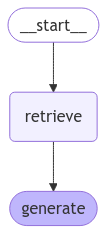

In [62]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

### `Do I need to use LangGraph?`
LangGraph is not required to build a RAG application. Indeed, we can implement the same application logic through invocations of the individual components:

In [ ]:
# Define the user's question
question = "...."

# Perform a similarity search in the vector store to retrieve relevant context
context = vector_store.similarity_search(question)

# Format the retrieved context into a structured prompt for the RAG model
prompt = rag_prompt.invoke({
    "question": question,
    "context": "\n\n".join(cnxt.page_content for cnxt in context)  # Join retrieved context with line breaks
})

# Generate a response from the language model (LLM) synchronously
response = llm.invoke(prompt)

# Stream the response asynchronously in real-time
async for chunk in llm.astream(prompt):
    print(chunk.content, end=" ", flush=True)  # Print output incrementally

The benefits of LangGraph include:

- Support for multiple invocation modes: this logic would need to be rewritten if we wanted to stream output tokens, or stream the results of individual steps;
- Automatic support for tracing via [LangSmith](https://docs.smith.langchain.com/) and deployments via [LangGraph Platform](https://langchain-ai.github.io/langgraph/concepts/langgraph_platform/);
- Support for persistence, human-in-the-loop, and other features.

Many use cases require Retrieval-Augmented Generation (RAG) in a conversational experience, allowing users to receive context-aware responses within a stateful dialogue. LangGraph simplifies this process by efficiently managing and persisting state, making it well-suited for such applications.

### Usage
Let's test our application! LangGraph supports multiple invocation modes, including sync, async, and streaming.

**Invoke:**

In [48]:
result = await graph.ainvoke({"question": "What is Task Decomposition?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='ff3c2b22-dafc-4893-9290-6d6c1cf365f5', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 1585.0}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.'), Document(id='4360aa34-24d3-415f-82e3-51270934c43a', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 19372.0}, page_content="(3) Task execution: Expert models execute o

**Stream steps:**

In [49]:
async for chunk in graph.astream({
    "question": "What is Task Decomposition?"
}, stream_mode="updates"):
  print(chunk, end="\n\n----------------\n", flush=True)

{'retrieve': {'context': [Document(id='ff3c2b22-dafc-4893-9290-6d6c1cf365f5', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 1585.0}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.'), Document(id='4360aa34-24d3-415f-82e3-51270934c43a', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 19372.0}, page_content="(3) Task execution: Expert 

**Stream tokens:**

In [50]:
async for message, metadata in graph.astream(
    {"question": "What is Task Decomposition?"},
    stream_mode="messages"
):
  print(message.content, end=" ", flush=True)

Task  decomposition  is  a  technique  used  to  break  down  complex  tasks  into  smaller  and  simpler  ones ,  making  it  easier  for  models  to  understand  and  solve  them .  It  involves  chain  of  thought  ( Co T )  prompting  techniques  that  instruct  models  to  " think  step  by  step "  to  decom pose  hard  tasks  into  manageable  steps .  The  goal  of  task  decomposition  is  to  transform  big  tasks  into  multiple  simpler  ones ,  providing  insights  into  the  model 's  thinking  process .  

In [51]:
metadata

{'langgraph_step': 2,
 'langgraph_node': 'generate',
 'langgraph_triggers': ['retrieve'],
 'langgraph_path': ('__pregel_pull', 'generate'),
 'langgraph_checkpoint_ns': 'generate:2707de87-d350-483e-8719-7b8ef6e0f3cb',
 'checkpoint_ns': 'generate:2707de87-d350-483e-8719-7b8ef6e0f3cb',
 'ls_provider': 'openai',
 'ls_model_name': 'llama3.2',
 'ls_model_type': 'chat',
 'ls_temperature': None}

💡 tip

- For synchronous invocations, use:

  `result = graph.invoke(...)`


- For synchronous for step in graph.stream(...):

 ` for step in graph.stream(query, stream_mode="updates"):`

- For synchronous for token in graph.stream(...):

 ` for message, metadata in graph.stream(query, stream_mode="messages"):`

[Chat models](https://python.langchain.com/docs/concepts/chat_models/) take in a sequence of messages and return a message.

- [Docs](https://python.langchain.com/docs/how_to/#chat-models)
- [Integrations](https://python.langchain.com/docs/integrations/chat/): 25+ integrations to choose from.
- [Interface](https://python.langchain.com/api_reference/core/language_models/langchain_core.language_models.chat_models.BaseChatModel.html): API reference for the base interface.

**Customizing the prompt**

As shown above, we can load prompts (e.g., [this RAG prompt](https://smith.langchain.com/hub/rlm/rag-prompt)) from the prompt hub. The prompt can also be easily customized. For example:

In [52]:
from langchain_core.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}

Helpful Answer:"""

custom_rag_prompt = PromptTemplate.from_template(template)

**API Reference**:[PromptTemplate](https://python.langchain.com/api_reference/core/prompts/langchain_core.prompts.prompt.PromptTemplate.html)

## Query analysis
So far, we are executing the retrieval using the raw input query. However, there are some advantages to allowing a model to generate the query for retrieval purposes. For example:

- In addition to semantic search, we can build in structured filters (e.g., "Find documents since the year 2020.");
- The model can rewrite user queries, which may be multifaceted or include irrelevant language, into more effective search queries.

[Query analysis](https://python.langchain.com/docs/concepts/retrieval/#query-analysis) employs models to transform or construct optimized search queries from raw user input. We can easily incorporate a query analysis step into our application. For illustrative purposes, let's add some metadata to the documents in our vector store. We will add some (contrived) sections to the document which we can filter on later.

In [53]:
total_documents = len(all_splits)
third = total_documents // 3

for i, document in enumerate(all_splits):
    if i < third:
        document.metadata["section"] = "beginning"
    elif i < 2 * third:
        document.metadata["section"] = "middle"
    else:
        document.metadata["section"] = "end"


all_splits[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'start_index': 8,
 'text': 'LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine th

We will need to update the documents in our vector store. Refer to the [vector store integration documentation](https://python.langchain.com/docs/integrations/vectorstores/) for relevant features of your chosen vector store.

In [54]:
from pinecone import Pinecone, ServerlessSpec
from langchain_pinecone import PineconeVectorStore
import time

if not os.getenv("PINECONE_API_KEY"):
    os.environ["PINECONE_API_KEY"] = getpass.getpass("Enter your Pinecone API key: ")

pinecone_api_key = os.environ.get("PINECONE_API_KEY")
pc = Pinecone(api_key=pinecone_api_key)

indexes = pc.list_indexes()

new_index = "langchain-minimal-rag-implementation-v2"
if new_index not in indexes:
  pc.create_index(
      name=new_index,
      metric="cosine",
      dimension=len(vector_a),
      spec = ServerlessSpec(
          cloud="aws",
          region="us-east-1"
      )
  )
while not pc.describe_index(new_index)["status"]["ready"]:
  time.sleep(1)

In [55]:
index_v2 = pc.Index(new_index)
vector_store_v2 = PineconeVectorStore(embedding=embedding, index=index_v2)
doc_ids_v2 = vector_store_v2.add_documents(all_splits)
doc_ids_v2[:10]

['a8667ce6-80de-4159-87f8-36005546db59',
 'c4a5c9b7-ee68-4f74-911f-28fed902c0fd',
 'cc7d84da-a701-4464-b72d-e05e1957997e',
 '3618f8ce-28a8-4279-8c76-b82c06794925',
 'bdfc1516-f99a-40ea-94a1-d943f9acfbd2',
 'd593ab1f-fccf-496d-9c58-6a54375fa3f1',
 '126fdbb2-d668-44fd-aff2-38a875052841',
 '147c90f1-8368-401c-b44f-253c9f67344c',
 'e4e0d428-0f41-427d-a3e9-18255ae27815',
 '83bfa13c-5fd2-4a48-b600-20f5a0e4b60f']

Let's next define a schema for our search query. We will use [structured output](https://python.langchain.com/docs/concepts/structured_outputs/) for this purpose. Here we define a query as containing a string query and a document section (either "beginning", "middle", or "end"), but this can be defined however you like.

In [56]:
from typing import Literal
from typing_extensions import List, TypedDict, Annotated

class Search(TypedDict):
    """
    Structured search query used for document retrieval.

    Attributes:
        query: The text query used to search documents.
        section: Specifies which part of the document to focus on.
                 Must be one of "beginning", "middle", or "end".
    """
    query: Annotated[
        str,
        ...,
        "The concise optimized text query to search for in the documents."
    ]
    section: Annotated[
        Literal["beginning", "middle", "end"],
        ...,
        "Specifies the document section to filter results. Choose from 'beginning', 'middle', or 'end'."
    ]

Finally, we add a step to our LangGraph application to generate a query from the user's raw input:

In [70]:
class State(TypedDict):
    question: str
    query: Search
    context: List[Document]
    answer: str


def analyze_query(state: State):
    structured_llm = llm.with_structured_output(Search)
    query = structured_llm.invoke(state["question"])
    return {"query": query}


def retrieve(state: State):
    query = state["query"]
    retrieved_docs = vector_store_v2.similarity_search(
        query["query"],
        filter={"section": query["section"]},
    )
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = rag_prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}


graph_builder = StateGraph(State).add_sequence([analyze_query, retrieve, generate])
graph_builder.add_edge(START, "analyze_query")
graph = graph_builder.compile()

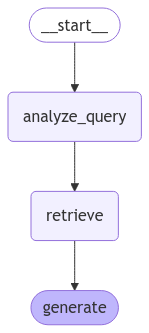

In [68]:
display(Image(graph.get_graph().draw_mermaid_png()))

We can test our implementation by specifically asking for context from the end of the post. Note that the model includes different information in its answer.

In [71]:
for step in graph.stream(
    {"question": "What does the end of the post say about Task Decomposition?"},
    stream_mode="updates",
):
    print(f"{step}\n\n----------------\n")

{'analyze_query': {'query': {'query': 'Task Decomposition', 'section': 'end'}}}

----------------

{'retrieve': {'context': [Document(id='de8228d6-a365-4779-bff0-85a73b9ccb19', metadata={'section': 'end', 'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 39220.0}, page_content='Finite context length: The restricted context capacity limits the inclusion of historical information, detailed instructions, API call context, and responses. The design of the system has to work with this limited communication bandwidth, while mechanisms like self-reflection to learn from past mistakes would benefit a lot from long or infinite context windows. Although vector stores and retrieval can provide access to a larger knowledge pool, their representation power is not as powerful as full attention.\n\n\nChallenges in long-term planning and task decomposition: Planning over a lengthy history and effectively exploring the solution space remain challenging. LLMs struggle to a